In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_lr_scale(current_step):
  n_warmup_steps = 4000
  anneal_steps = [300000, 400000, 500000]
  anneal_rate = 0.3

  lr = np.min(
      [
          np.power(current_step, -0.5),
          np.power(n_warmup_steps, -1.5) * current_step,
      ]
    )
  for s in anneal_steps:
    if current_step > s:
      lr = lr * anneal_rate
  return lr

def update_learning_rate(current_step):
  """ Learning rate scheduling per step """
  init_lr=np.power(256, -0.5)
  lr = init_lr * get_lr_scale(current_step)

  return lr

In [8]:
step = list(range(1,900000))

In [10]:
lr = []
for s in step:
  lr.append(update_learning_rate(s))

In [15]:
print(np.power(256, -0.5))
print(lr[0])
print(lr[4000])

0.0625
2.4705294220065465e-07
0.0009880882654879073


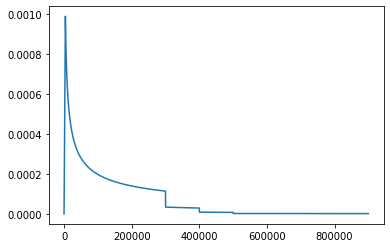

In [11]:
plt.plot(step, lr)